In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import shap
shap.initjs()

#DATASET

In [ ]:
columns = [
    "sex", "length", "diameter", "height",
    "whole_weight", "shucked_weight", "viscera_weight",
    "shell_weight", "rings"
]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url, header=None, names=columns)
df.head(), df.shape


(  sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
 0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
 1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
 2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
 3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
 4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
 
    shell_weight  rings  
 0         0.150     15  
 1         0.070      7  
 2         0.210      9  
 3         0.155     10  
 4         0.055      7  ,
 (4177, 9))

##Lets explore the dataset

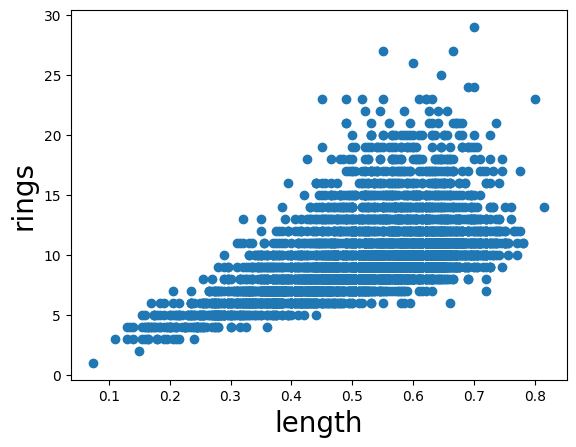

In [ ]:
#plt1
plt.scatter(df['length'], df['rings'])
plt.xlabel('length',size=20)
plt.ylabel('rings',size=20)
plt.show()

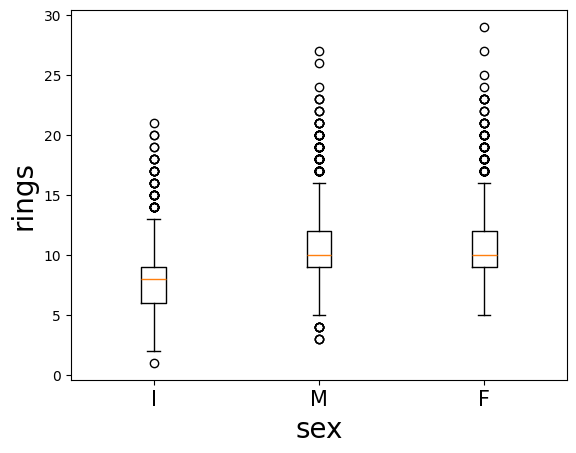

In [ ]:
#plt2:sex
plt.boxplot(df[df.sex=='I']['rings'],positions=[1])
plt.boxplot(df[df.sex=='M']['rings'],positions=[2])
plt.boxplot(df[df.sex=='F']['rings'],positions=[3])
plt.xticks([1,2,3],['I','M','F'],size=15)
plt.ylabel('rings',size=20)
plt.xlabel('sex',size=20)
plt.show()

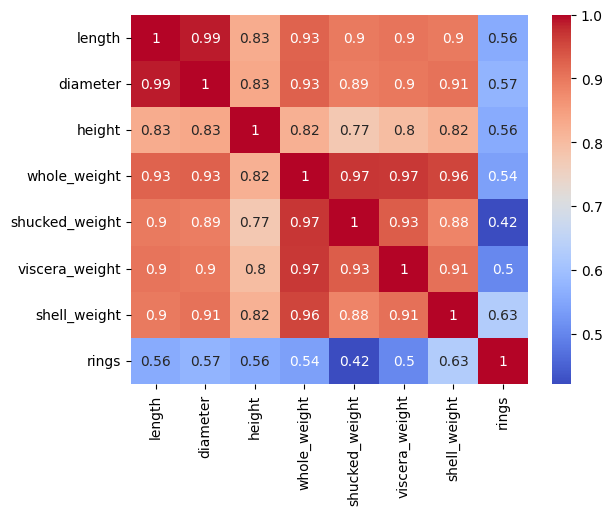

In [ ]:
#plt3:heatmap
cont = columns = [
    "length", "diameter", "height",
    "whole_weight", "shucked_weight", "viscera_weight",
    "shell_weight", "rings"
]
corr = df[cont].corr()
sns.heatmap(corr,cmap='coolwarm', annot=True)
plt.show()

#Feature Engineering

In [ ]:
y = df['rings']
x = df.drop(['rings','diameter','whole_weight'],axis=1)

In [ ]:
x

,sex,length,height,shucked_weight,viscera_weight,shell_weight
0,M,0.455,0.095,0.2245,0.1010,0.1500
1,M,0.350,0.090,0.0995,0.0485,0.0700
2,F,0.530,0.135,0.2565,0.1415,0.2100
3,M,0.440,0.125,0.2155,0.1140,0.1550
4,I,0.330,0.080,0.0895,0.0395,0.0550
...,...,...,...,...,...,...
4172,F,0.565,0.165,0.3700,0.2390,0.2490
4173,M,0.590,0.135,0.4390,0.2145,0.2605
4174,M,0.600,0.205,0.5255,0.2875,0.3080
4175,F,0.625,0.150,0.5310,0.2610,0.2960


In [ ]:
x['sex.M']=[1 if i=='M' else 0 for i in x['sex']]
x['sex.F']=[1 if i=='F' else 0 for i in x['sex']]
x['sex.I']=[1 if i=='I' else 0 for i in x['sex']]
x.drop('sex',axis=1,inplace=True)

In [ ]:
x.head()

,length,height,shucked_weight,viscera_weight,shell_weight,sex.M,sex.F,sex.I
0,0.455,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.080,0.0895,0.0395,0.055,0,0,1


#Model Training

In [ ]:
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

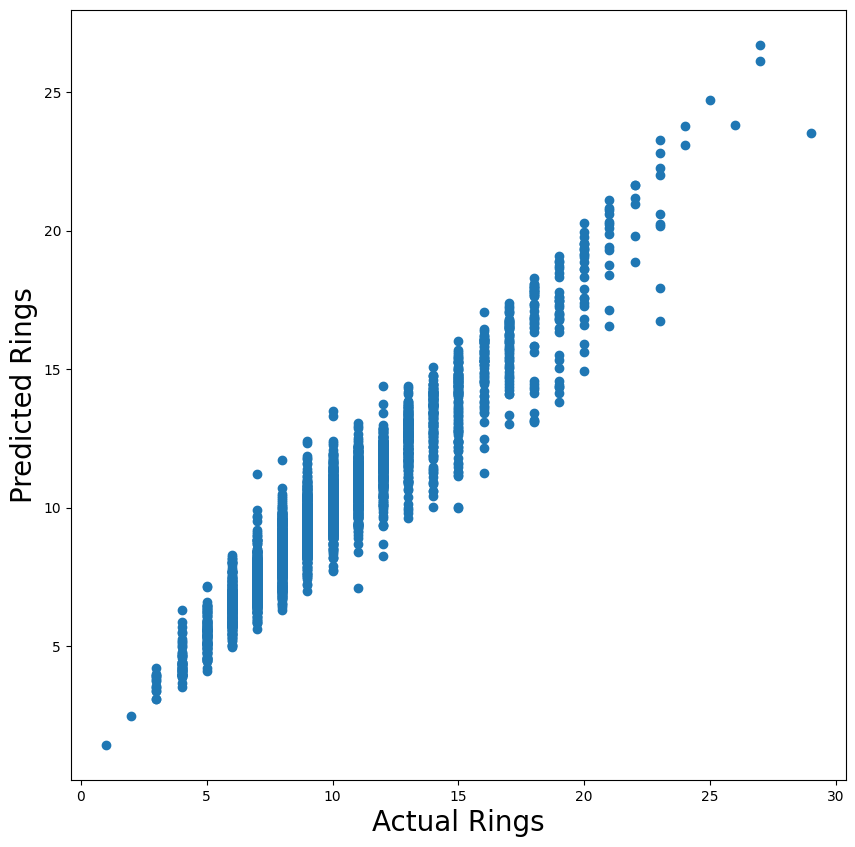

In [ ]:
y_pred = model.predict(x)
plt.figure(figsize=(10,10))
plt.scatter(y,y_pred)
plt.xlabel('Actual Rings',size=20)
plt.ylabel('Predicted Rings',size=20)
plt.show()

SHAP

In [ ]:
explainer = shap.Explainer(model.predict,x)
shap_values = explainer(x[:100])

In [ ]:
np.shape(shap_values.values)

(100, 8)

##Waterfall plot

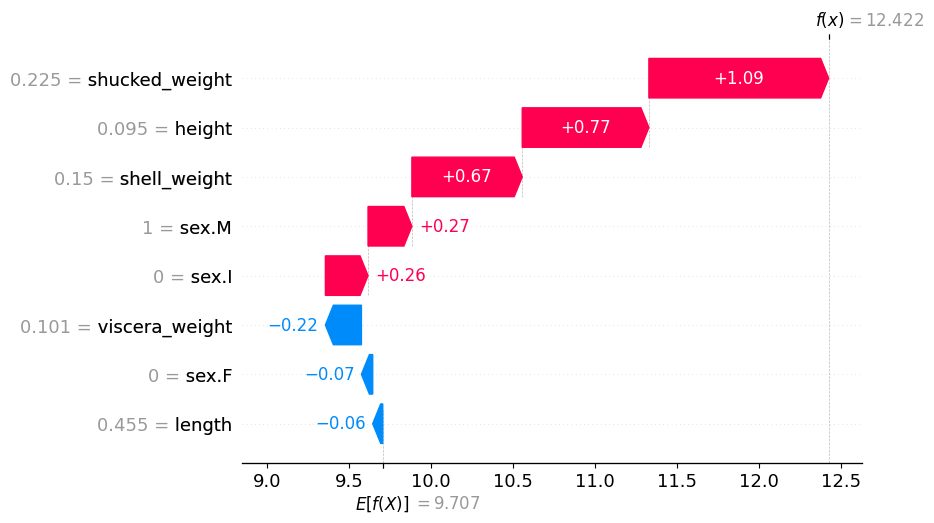

In [ ]:
shap.plots.waterfall(shap_values[0])

- E[f(X)] is average number of predicted rings
- f(x) is predicted number of rings for this particular abalone.
- the values in graph tell how each feature has contributed in the difference between avg and predicted number of rings.
- the values on the left are the actual feature values for that particular abalone




##Forceplot

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0:100])

##Absolute mean SHAP

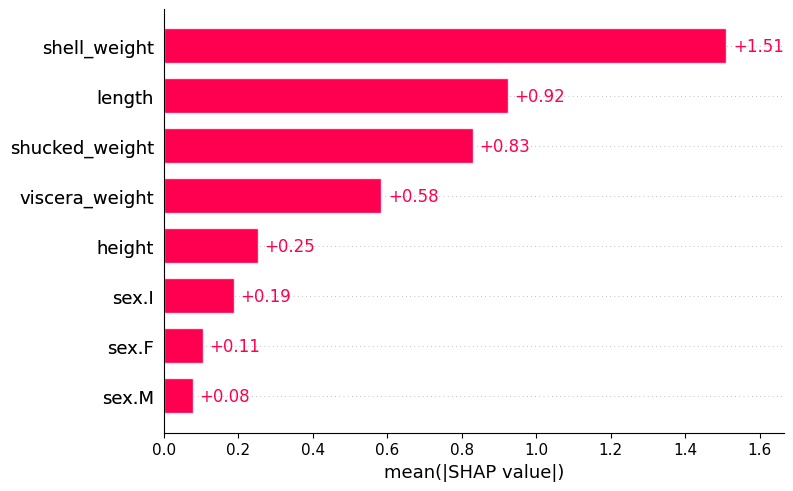

In [ ]:
shap.initjs()
shap.plots.bar(shap_values)

##Beswarm plot

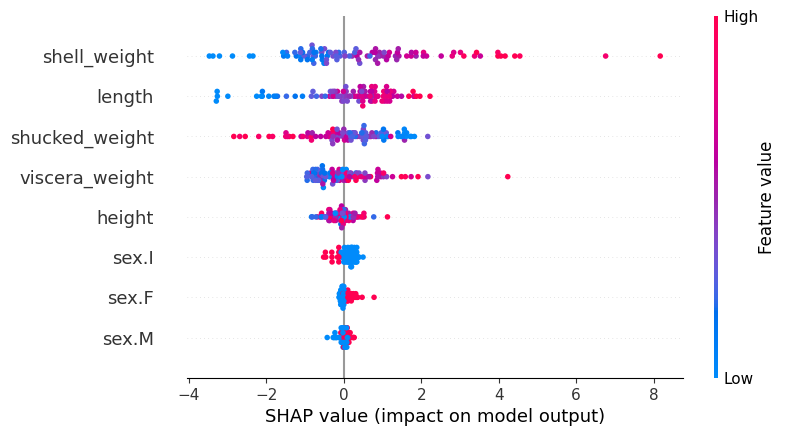

In [ ]:
shap.plots.beeswarm(shap_values)

##Dependence Plot

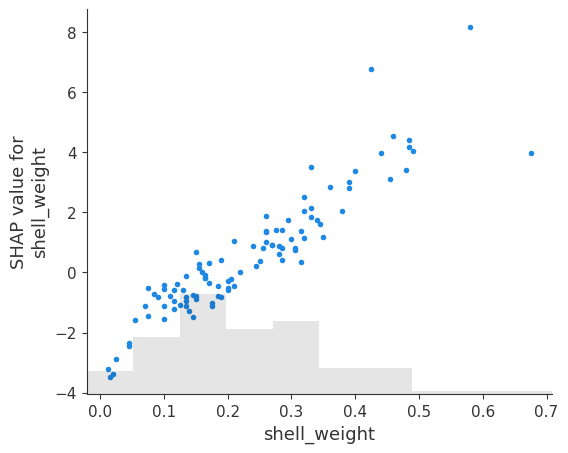

In [ ]:
shap.plots.scatter(shap_values=shap_values[:,"shell_weight"])

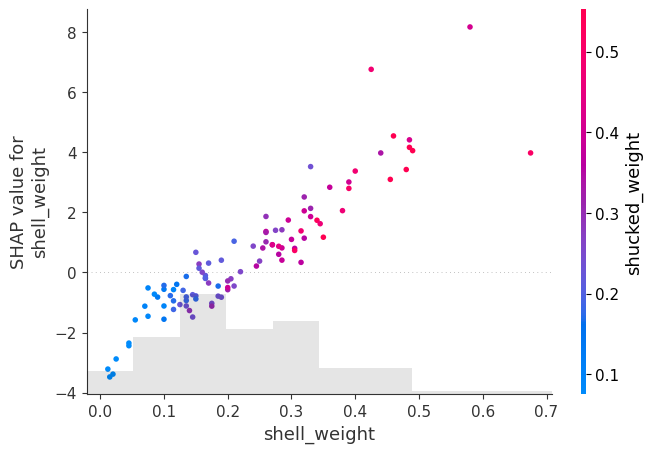

In [ ]:
shap.plots.scatter(shap_values[:,"shell_weight"],shap_values[:,"shucked_weight"])

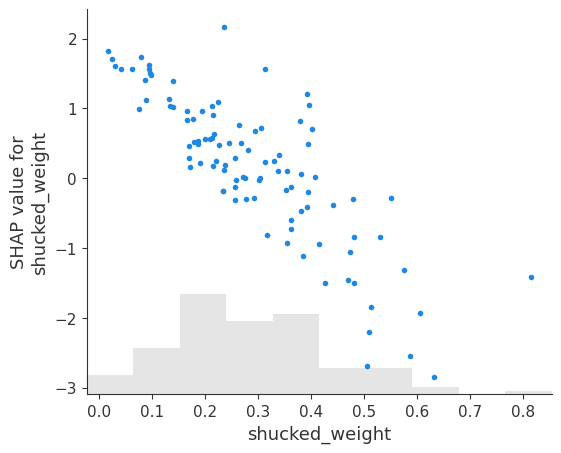

In [ ]:
shap.plots.scatter(shap_values[:,"shucked_weight"])